In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_csv("data/titanic.csv")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Provide a visualization to communicate the analyses below

## How did survival depend on sex and class?

In [4]:
df=data.groupby(['sex', 'class']).survived.mean().reset_index()

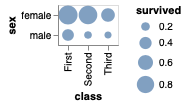

In [5]:
alt.Chart(df).mark_circle().encode(
 x='class',
 y='sex',
 size='survived'   
)

## What was the distribution of passengers in decks

In [6]:
df=data.groupby(['deck']).survived.count().reset_index()
df.columns = ['deck', 'passengers']

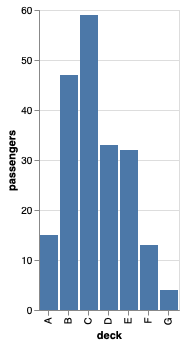

In [7]:
alt.Chart(df).mark_bar().encode(
 x = 'deck',
 y = 'passengers'
)

## Does deck correlate with class?

In [8]:
df=data.groupby(['deck', 'class']).survived.count().fillna(0).reset_index()
df.columns = ['deck', 'class', 'passengers']

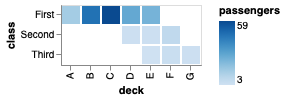

In [9]:
alt.Chart(df).mark_bar().encode(
    x = 'deck',
    y = 'class',
    color = 'passengers'
)

## How did survival depend on deck?

In [10]:
df1 = data.groupby(['deck']).survived.mean().reset_index()
df1

,deck,survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000


In [11]:
df2 = data.groupby(['deck']).survived.sum().reset_index()
df2

,deck,survived
0,A,7
1,B,35
2,C,35
3,D,25
4,E,24
5,F,8
6,G,2


In [12]:
chart1 = alt.Chart(df1).mark_bar().encode(
    y = 'deck',
    x = 'survived')

In [13]:
chart2 = alt.Chart(df2).mark_bar().encode(
    y = 'deck',
    x = 'survived')

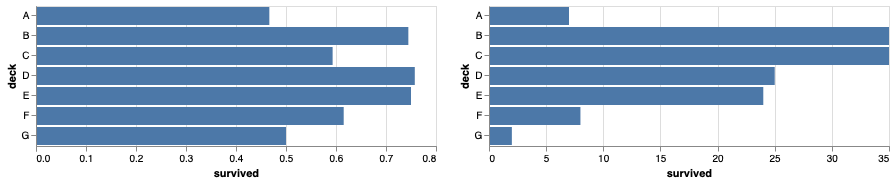

In [14]:
chart1 | chart2